In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [2]:
#Spat freq. from trap frequency and magnification
M = 14.1
deltaM = 0.1
ionDistance = 6.696e-6
deltaIonDistance = 0.006e-6


def f_spat(lam, ionDistance, Magnification):
    return (2*np.pi/lam)*ionDistance*Magnification

def delta_f_spat(lam, ionDistance, Magnification, deltaIonDistance, deltaMagnification):
    k_l = (2*np.pi/lam)
    return np.sqrt((k_l*Magnification*deltaIonDistance)**2 + (k_l*ionDistance*deltaMagnification)**2)

f = f_spat(397e-9, ionDistance, M)
delta_f = delta_f_spat(397e-9, ionDistance, M, deltaIonDistance, deltaM)
relative_delta = delta_f/f

print("theoretical spatial freq.: " + str(f) + " \pm " + str(delta_f) + " (\pm " +str(relative_delta*100) + "%)")

theoretical spatial freq.: 1494.2522526900016 \pm 10.681782131636902 (\pm 0.7148580242999273%)


In [7]:
#Spat frequency from experimental evaluation
L = 0.448
deltaL = 0.001
#15 center dets
spatialFreq = 1489.8031150200475
deltaSpatialFreq = 2.862965563152965
#40 center dets
spatialFreq = 1490.2101171464583
deltaSpatialFreq = 1.7707518921594856

<IPython.core.display.Javascript object>


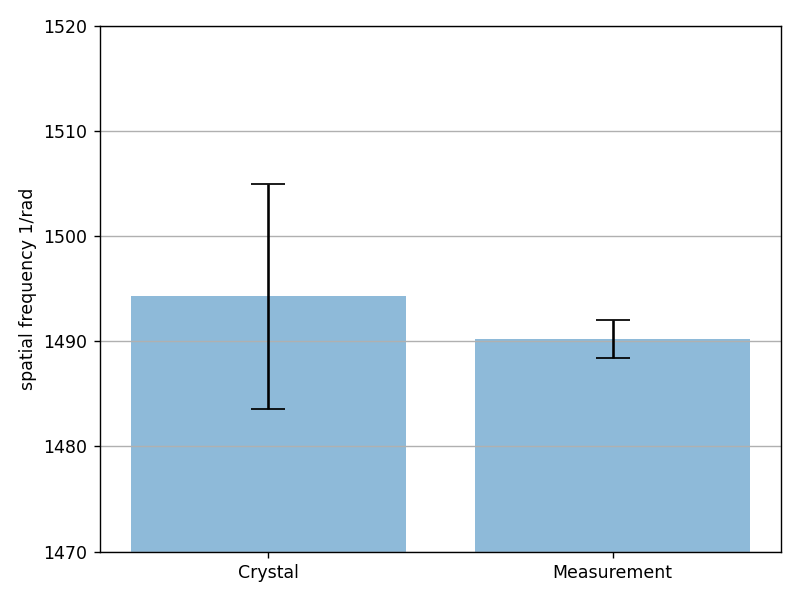

In [8]:
#Comparison
#make a fucking bar chart
# Build the plot

x_pos = ["Crystal", "Measurement"]
CTEs = [f, spatialFreq]
error = [delta_f, deltaSpatialFreq]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('spatial frequency 1/rad')
ax.set_xticks(x_pos)
ax.yaxis.grid(True)
ax.set_ylim([1470, 1520])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

<IPython.core.display.Javascript object>


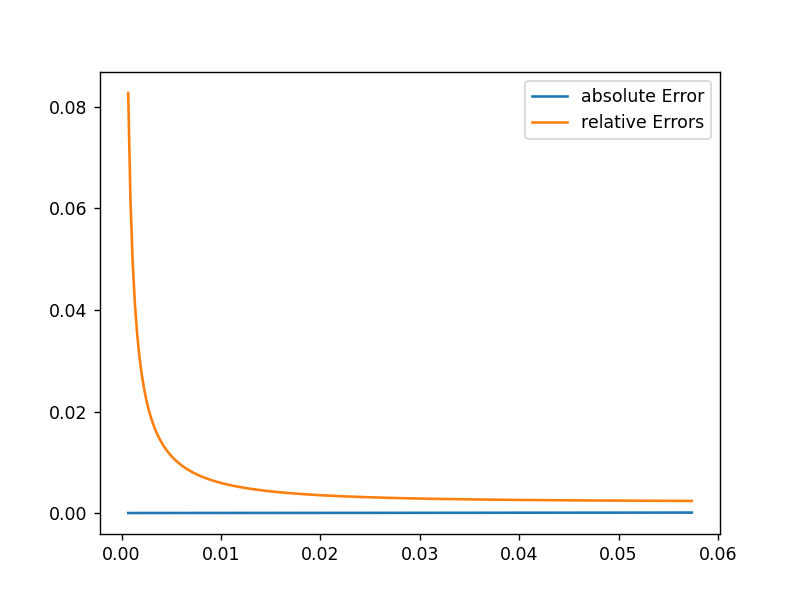

mean relative Error: 0.54364844588013%
Resulting systematic error on spatrial frequency: 1490.2101171464583 \pm 8.101504142215184


In [9]:
#Systematic error of spatial frequency
activeArea = 0.0254
achievableResolution = 1024
pixelFluctuation = activeArea/achievableResolution

def angular(x, L):
    return x/L

def deltaAngular(x, deltaX, L, deltaL):
    partOne = deltaX/L 
    partTwo = (x/L**2)*deltaL
    return np.sqrt(partOne**2 + partTwo**2)
    
    
xes = np.linspace(-1*activeArea/2, activeArea/2, num=250) + 0.013
angles = angular(xes, L)
deltaAngles = deltaAngular(xes, pixelFluctuation, L, deltaL)

relativeDeltas = deltaAngles/angles

plt.figure()
plt.plot(angles, deltaAngles, label="absolute Error")
plt.plot(angles, relativeDeltas, label="relative Errors")
plt.legend(loc="best")
plt.show()

meanRelativeError = np.mean(relativeDeltas)
spatialFreqSystematicError = spatialFreq * meanRelativeError
print("mean relative Error: " + str(meanRelativeError*100) + "%")
print("Resulting systematic error on spatrial frequency: " + str(spatialFreq) + " \pm " + str(spatialFreqSystematicError))